# Projet Speed Dating (Tinder)

## Compréhension du contexte des données

La lecture du document [Dataset Description](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc) permet de mieux comprendre les colonnes que nous allons trouver dans le dataset.

Lors de chaque événement de speed dating, les candidats se sont vu proposer plusieurs questionnaires, à plusieurs étapes du processus:
- lors de l'inscription: information personnelles et attentes quant aux attributs des partenaires à rencontrer
- aprés chaque rencontre: notes sur les attributs du partenaire rencontré
- au milieu de l'évènement: ré-évaluation des attentes du candidat et de sa perception de lui-même
- le lendemain de l'évènement: avis sur l'event, notation des attributs selon différentes perspectives
- 3 à 4 semaines aprés l'évènement: suivi des matchs, notation des attributs selon différentes perspectives

Le candidat est amené à plusieur reprises et selon différentes perspective à noter les attributs suivant:
- attractivité (attr: Attractive)
- sincérité (sinc: Sincere)
- intelligence (intel: Intelligent)
- amusement (fun: Fun)
- ambition (amb: Ambitious)
- intérêts communs (shar: Shared Interests/Hobbies)

Perspectives à prendre (selon le moment du questionnaire) lors de la notation:
- Ce que est important pour vous chez un partenaire
- Perception de ce que la plupart des personnes du même sexe recherchent
- Perception de ce que le sexe opposé recherche
- Auto-évaluation (comment le candidat se perçoit)
- Évaluation du partenaire rencontré
- Perception de comment les autres vous perçoivent
- Importance réelle dans les décisions

Tous ces éléments se retrouvent encodés dans les libellés des paramètres concernés (attr, sinc, intel, fun, amb, shar).
Libellé: `attrib{P}_{T}`
- `{P}`: la perspective, la contexte pour la notation
- `{T}`: à quel moment le questionnaire a été rempli

Chronologie:

| Moment | T |
| --- | --- |
| lors de l'inscription  | 1 |
| aprés chaque rencontre | blank label, no suffix |
| au milieu de l'évènement | s |
| le lendemain de l'évènement | 2  |
| 3 à 4 semaines aprés l'évènement | 3 |

Perpesctive de la notation:

| Perspective | P |
| --- | --- |
| Ce que est important pour vous chez un partenaire | 1 |
| Perception de ce que le sexe opposé recherche | 2 |
| Auto-évaluation (comment le candidat se perçoit) | 3 |
| Perception de ce que la plupart des personnes du même sexe recherchent | 4 |
| Perception de comment les autres vous perçoivent | 5 |
| Évaluation du partenaire rencontré | blank label, no suffix |
| Importance réelle dans les décisions | 7 |

Disponibilité de perpesctive des attributs en fonction de la chronologie:

| Perspective | lors de l'inscription | aprés chaque rencontre | au milieu de l'évènement |  le lendemain | 3 à 4 semaines aprés |
| --- | --- | --- | --- | --- | --- |
| Ce que est important pour vous chez un partenaire | x |  | x | x | x |
| Perception de ce que le sexe opposé recherche | x |  |  | x | x |
| Auto-évaluation (comment le candidat se perçoit) | x |  | x | x | x |
| Perception de ce que la plupart des personnes du même sexe recherchent | x |  |  | x | x |
| Perception de comment les autres vous perçoivent | x |  |  | x | x |
| Évaluation du partenaire rencontré |  | x |  |  |  |
| Importance réelle dans les décisions |  |  |  | x | x |

### Les vagues: évenement de speed-dating
Il est a noté que selon les vagues toutes les données ne seront pas forcément disponibles ou n'auront pas le même format de notation.
Au sein d'une même vague on peut aussi avoir des mécanisme de notation différent d'un temps à l'autre.

On peut notamment avoir des attributs notés de 1 à 10 pour les vagues 6 à 9 alors que le candidat doit répartir un total de 100 points sur l'ensemble de ceux-ci pour les vagues 1 à 5 et 10 à 21.

**attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1**:
- Waves 6-9: scale of 1-10 (1=not at all important, 10=extremely important)
- Waves 1-5, 10-21: You have 100 points to distribute (give more points to those attributes that are more important)

**attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1**:
- Waves 6-9: scale of 1-10 (1=not at all important, 10=extremely important)
- Waves 10-21: You have 100 points to distribute (give more points to those attributes that are more important)
- No waves 1-5

**attr2_1, sinc2_1, int2_1, fun2_1, amb2_1, shar2_1**:
- Waves 6-9: scale of 1-10 (1=not at all important, 10=extremely important)
- Waves 1-5, 10-21: You have 100 points to distribute (give more points to those attributes that are more important)

**attr1_2, sinc1_2, intel1_2, fun1_2, amb1_2, shar1_2**:
- Waves 6-9: scale of 1-10 (1=not at all important, 10=extremely important)
- Waves 1-5, 10-21: You have 100 points to distribute (give more points to those attributes that are more important)


On notera également que certaines perspectives ne sont pas disponbles sur certaines vagues (exemple: perception de ce que la plupart des personnes du même sexe recherchent sur les vagues 6 à 21 seulement).

Toutes ces inconsistences ne rendent pas l'exploitation aisée.

### Target

La variable qui nous intéresse est la colonne `match` indiquant si deux candidats se sont réciproquement choisis lors de leur tour durant le speed-dating. 

## Import de modules externes

In [1]:
import requests
import pandas as pd
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from skimpy import skim
import missingno as msno

from speed_dating_document_context import (
    all_documented_columns,
    participant_cols,
    LabelDecoder,
)

from viz import plot_attribute_expectations_per_genre

from config import (
    JEDHA_SPEED_DATING_DATA_EXPLANATIONS_URL,
    LOCAL_SPEED_DATING_DATA_EXPLANATIONS_PATH,
    JEDHA_SPEED_DATING_CSV_URL,
    LOCAL_SPEED_DATING_CSV_PATH,
    # LOCAL_SPEED_DATING_DATA_EXPLANATIONS_MD_PATH
)

# display settings
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 1000)          # Expand display width
pd.set_option('display.max_colwidth', None)   # Show full content in each cell

Data folder: /workspaces/jedha-cdsd-cert-projects/bloc-2/speed-dating/data


In [2]:
# Retrive locally explanation document
if not LOCAL_SPEED_DATING_DATA_EXPLANATIONS_PATH.exists():
    response = requests.get(JEDHA_SPEED_DATING_DATA_EXPLANATIONS_URL)

    with open(LOCAL_SPEED_DATING_DATA_EXPLANATIONS_PATH, mode="wb") as file:
        file.write(response.content)

## Chargement des données

In [3]:
if not LOCAL_SPEED_DATING_CSV_PATH.exists():
    response = requests.get(JEDHA_SPEED_DATING_CSV_URL)

    with open(LOCAL_SPEED_DATING_CSV_PATH, mode="wb") as file:
        file.write(response.content)

# Loading DataFrame
speed_dating_df = pd.read_csv(LOCAL_SPEED_DATING_CSV_PATH, encoding="ISO-8859-1")

## Exploration initiale
### Vérifications basiques
- Shape
- Types
- Description

In [4]:
print("Shape:")
lines, columns = speed_dating_df.shape
print(f"- {columns} colonnes")
print(f"- {lines} lignes")

# Contextual stats
print("Number of participants: {}".format(len(speed_dating_df["iid"].unique())))
print()


Shape:
- 195 colonnes
- 8378 lignes
Number of participants: 551



In [5]:
# Display Index, Columns, and Data
speed_dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [6]:
print("Head:")
display(speed_dating_df.head())

print("Tail:")
display(speed_dating_df.tail())

Head:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Tail:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8373,552,22.0,1,44,2,21,22,14,10.0,5,18,526.0,0,0.64,0,26.0,3.0,10.0,10.0,30.0,20.0,10.0,15.0,1,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,NaN,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it's too much work),15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,19,527.0,0,0.71,0,24.0,6.0,50.0,20.0,10.0,5.0,10.0,5.0,0,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it's too much work),15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,20,528.0,0,-0.46,0,29.0,3.0,40.0,10.0,30.0,10.0,10.0,NaN,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it's too much work),15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0

In [7]:
all_csv_columns = speed_dating_df.columns
# ["iid","id","gender","idg","condtn","wave","round","position","positin1","order","partner","pid","match","int_corr","samerace","age_o","race_o","pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha","dec_o","attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","met_o","age","field","field_cd","undergra","mn_sat","tuition","race","imprace","imprelig","from","zipcode","income","goal","date","go_out","career","career_c","sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga","exphappy","expnum","attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1","attr4_1","sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1","attr2_1","sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1","attr3_1","sinc3_1","fun3_1","intel3_1","amb3_1","attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1","dec","attr","sinc","intel","fun","amb","shar","like","prob","met","match_es","attr1_s","sinc1_s","intel1_s","fun1_s","amb1_s","shar1_s","attr3_s","sinc3_s","intel3_s","fun3_s","amb3_s","satis_2","length","numdat_2","attr7_2","sinc7_2","intel7_2","fun7_2","amb7_2","shar7_2","attr1_2","sinc1_2","intel1_2","fun1_2","amb1_2","shar1_2","attr4_2","sinc4_2","intel4_2","fun4_2","amb4_2","shar4_2","attr2_2","sinc2_2","intel2_2","fun2_2","amb2_2","shar2_2","attr3_2","sinc3_2","intel3_2","fun3_2","amb3_2","attr5_2","sinc5_2","intel5_2","fun5_2","amb5_2","you_call","them_cal","date_3","numdat_3","num_in_3","attr1_3","sinc1_3","intel1_3","fun1_3","amb1_3","shar1_3","attr7_3","sinc7_3","intel7_3","fun7_3","amb7_3","shar7_3","attr4_3","sinc4_3","intel4_3","fun4_3","amb4_3","shar4_3","attr2_3","sinc2_3","intel2_3","fun2_3","amb2_3","shar2_3","attr3_3","sinc3_3","intel3_3","fun3_3","amb3_3","attr5_3","sinc5_3","intel5_3","fun5_3","amb5_3"]

# Comparaison des colonnes doc vs csv
print(f"Documented columns: {len(all_documented_columns)}")
print(f"CSV columns: {len(all_csv_columns)}")

doc_col_in_csv = 0

for doc_col in all_documented_columns:
    if doc_col in all_csv_columns:
        doc_col_in_csv += 1
        
print(f"Document columns in CSV: {doc_col_in_csv}")

Documented columns: 195
CSV columns: 195
Document columns in CSV: 195


In [8]:
# Display Data Types
display(speed_dating_df.dtypes)

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [9]:
# Summary Statistics
speed_dating_df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Few abnormal maximum values:
- attr_o: max 10.5
- fun_o: max 11
- gaming: max 14
- reading: max 13

In [10]:
skim(speed_dating_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8378   │ │ float64     │ 174   │                                                          │
│ │ Number of columns │ 195    │ │ int64       │ 13    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 8     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA    ┃ NA %                ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ iid       │     0 │                   0 │  283.7 │  158.6 │     1 │   154 │   281 │   407 │   552 │ ▇▆█▇▇█ │  │
│ │ id        │     1 │   0.011936022917164 │   8.96 │  5.491 │     1 │     4 │     8 │    13 │    22 │ █▆▇▄▄▂ │  │
│ │ gender    │     0 │                   0 │ 0.5006 │    0.5 │     0 │     0 │     1 │     1 │     1 │ █    █ │  │
│ │ idg       │     0 │                   0 │  17.33 │  10.94 │     1 │     8 │    16 │    26 │    44 │ █▇▆▅▄▂ │  │
│ │ condtn    │     0 │                   0 │  1.829 │ 0.3767 │     1 │     2 │     2 │     2 │     2 │ ▂    █ │  │
│ │ wave      │     0 │                   0 │  11.35 │  5.996 │     1 │     7 │    11 │    15 │    21 │ ▆▃▄█▄▆ │  │
│ │ round     │     0 │                   0 │  16.87 │  4.358 │     5 │    14 │    18 │    20 │    22 │ ▁▃ ▅▅█ │  │
│ │ position  │     0 │                   0 │  9.043 │  5.515 │     1 │     4 │     8 │    13 │    22 │ █▆▇▄▄▂ │  │
│ │ positin1  │  1846 │  22.033898305084747 │  9.296 │   5.65 │     1 │     4 │     9 │    14 │    22 │ █▆▇▄▄▂ │  │
│ │ order     │     0 │                   0 │  8.928 │  5.477 │     1 │     4 │     8 │    13 │    22 │ █▆▇▄▄▂ │  │
│ │ partner   │     0 │                   0 │  8.964 │  5.491 │     1 │     4 │     8 │    13 │    22 │ █▆▇▄▄▂ │  │
│ │ pid       │    10 │    0.11936022917164 │  283.9 │  158.6 │     1 │   154 │   281 │   408 │   552 │ ▇▆█▇▇█ │  │
│ │ match     │     0 │                   0 │ 0.1647 │ 0.3709 │     0 │     0 │     0 │     0 │     1 │ █    ▂ │  │
│ │ int_corr  │   158 │   1.885891620911912 │  0.196 │ 0.3035 │ -0.83 │ -0.02 │  0.21 │  0.43 │  0.91 │  ▂▅█▇▂ │  │
│ │ samerace  │     0 │                   0 │ 0.3958 │ 0.4891 │     0 │     0 │     0 │     1 │     1 │ █    ▅ │  │
│ │ age_o     │   104 │  1.2413463833850562 │  26.36 │  3.564 │    18 │    24 │    26 │    28 │    55 │  ▅█▁   │  │
│ │ race_o    │    73 │   0.871329672952972 │  2.757 │  1.231 │     1 │     2 │     2 │     4 │     6 │ ▁█▁▃ ▁ │  │
│ │ pf_o_att  │    89 │   1.062306039627596 │   22.5 │  12.57 │     0 │    15 │    20 │    25 │   100 │  ▅█▁▁  │  │
│ │ pf_o_sin  │    89 │   1.062306039627596 │   17.4 │  7.044 │     0 │    15 │ 18.37 │    20 │    60 │  ▁█▇▁  │  │
│ │ pf_o_int  │    89 │   1.062306039627596 │  20.27 │  6.783 │     0 │ 17.39 │    20 │ 23.81 │    50 │   ▃█▃  │  │
│ │ pf_o_fun  │    98 │  1.1697302458820722 │  17.46 │  6.086 │     0 │    15 │    18 │    20 │    50 │  ▁▆█▂  │  │
│ │ pf_o_amb  │   107 │   1.277154452136548 │  10.69 │  

### Valeurs manquantes

<Axes: >

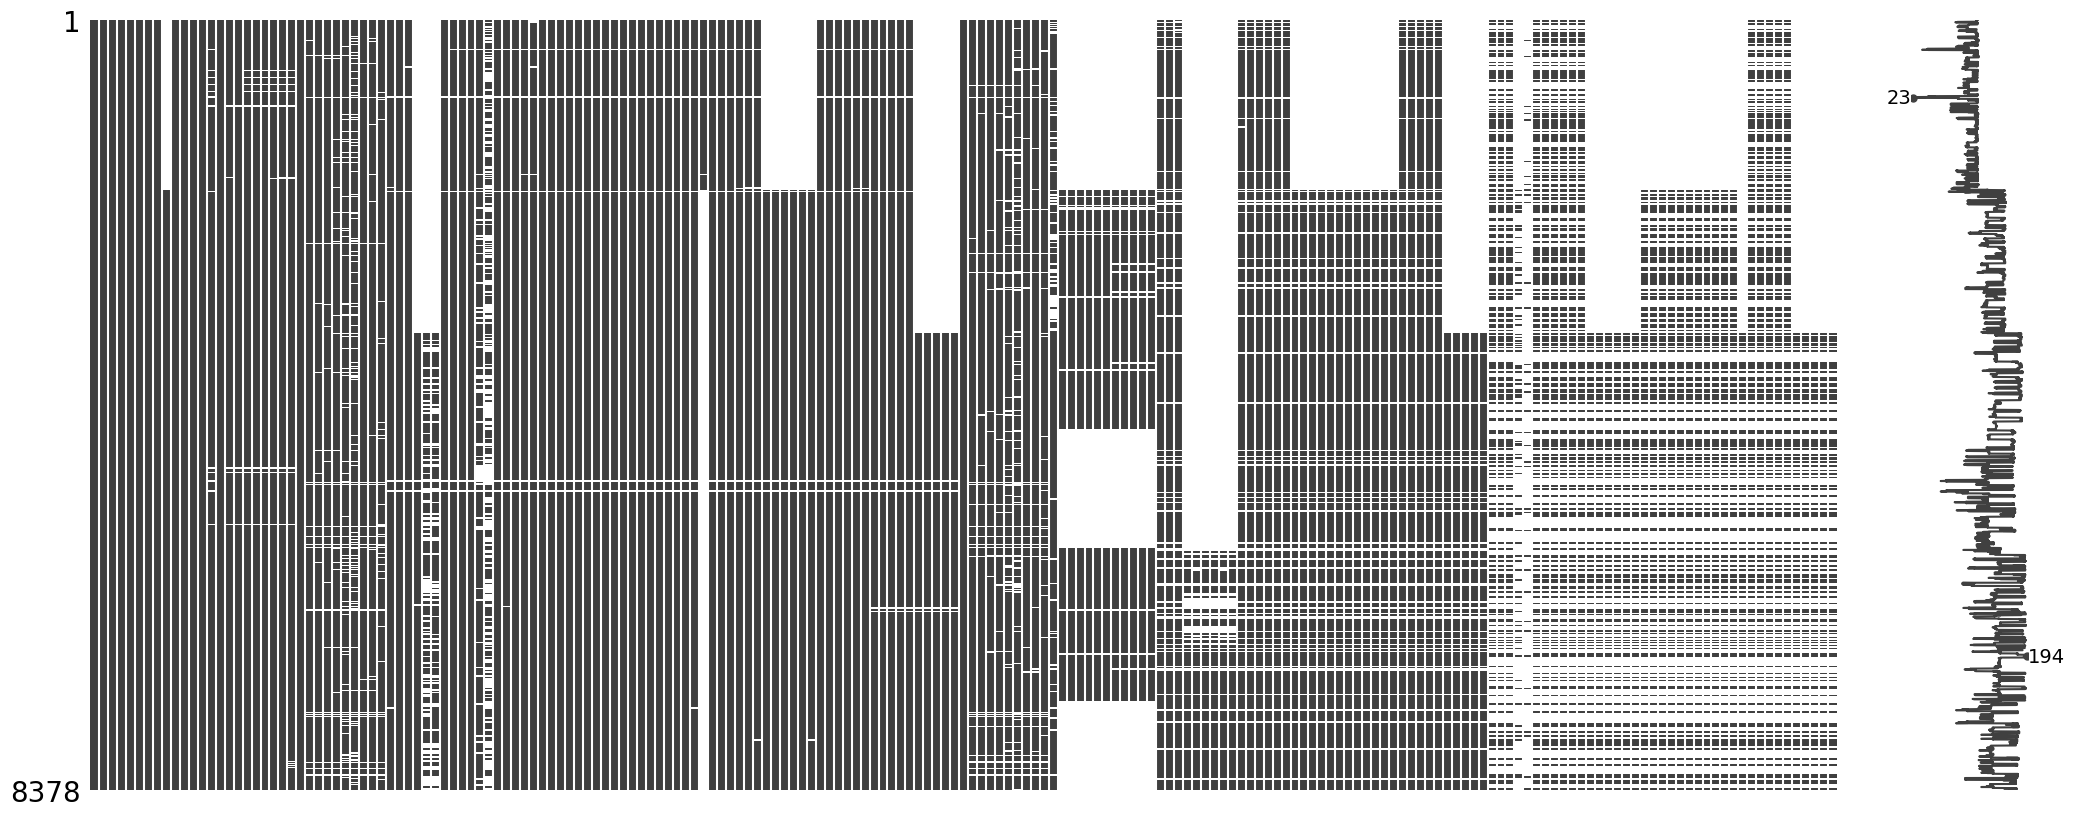

In [11]:
# N/A visualization
msno.matrix(speed_dating_df)

<Axes: >

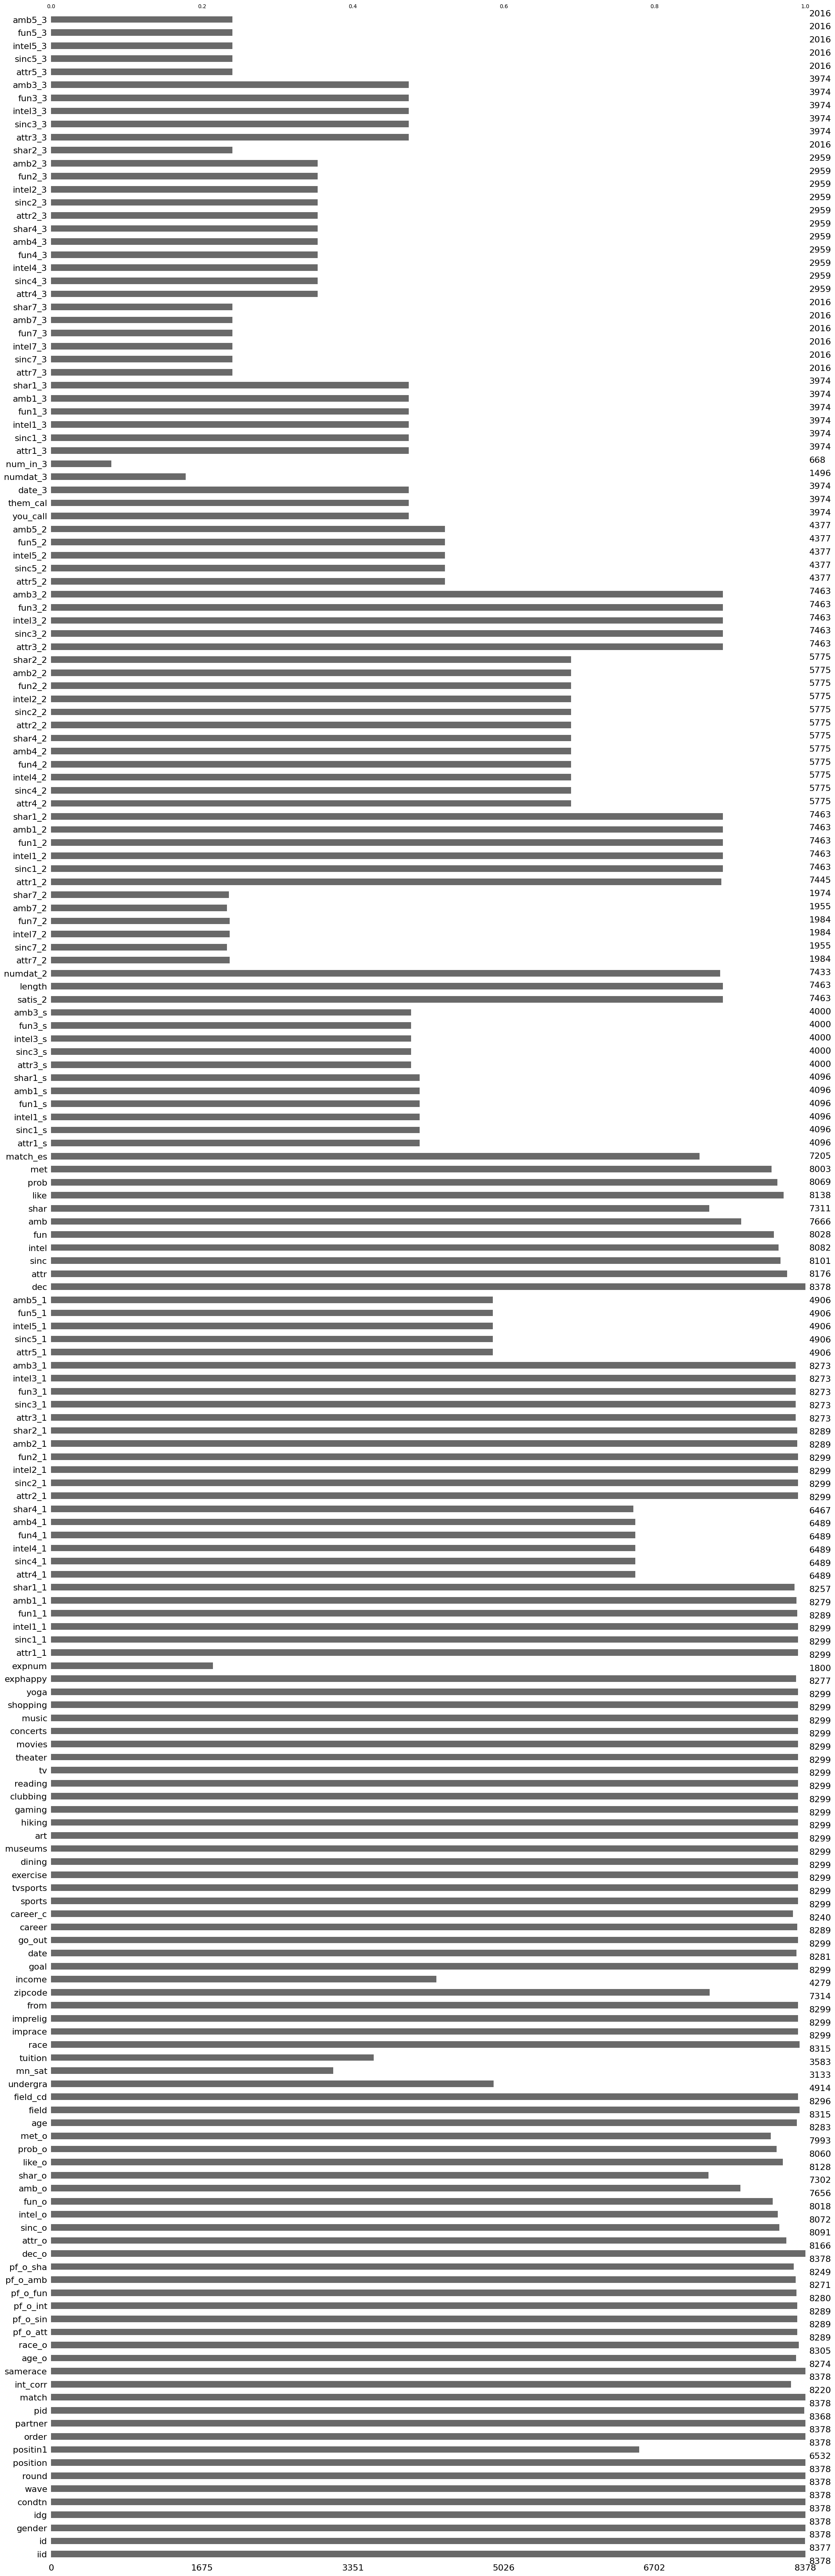

In [12]:
msno.bar(speed_dating_df)

# import matplotlib.pyplot as plt
# speed_dating_df.isna().sum().plot(kind="bar", )
# plt.show()

In [13]:
# cols_name = []
# cols_nb_null = []
# cols_nb_unique = []
# cols_cat = []
# for col in speed_dating_df.columns :
#     cols_name.append(col)
#     cols_nb_null.append(speed_dating_df[col].isnull().sum())
#     cols_nb_unique.append(speed_dating_df[col].nunique())
#     cat = col[len(col)-2::]
#     if cat in ["_1", "_s", "_2", "_3"] :
#         cat = cat[1]
#     else :
#         cat = "0"
#     cols_cat.append(cat)
    
# cols_infos = pd.DataFrame({"name" : cols_name, "nb_null" : cols_nb_null, "nb_unique" : cols_nb_unique, "cat" : cols_cat})

# cols_infos.sort_values(by="nb_null", ascending=False, inplace=True)


# px.histogram(cols_infos, x = "name", y = "nb_null")

#### Contrôle des notations des préférences
Pour les préferences dons l'échelle de notation varie, on va vérifier ce qu'il en est.
D'aprés la documentation on devrait observer différentes échelles de valeurs sur les blocs suivant:
- attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1
- attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1
- attr2_1, sinc2_1, int2_1, fun2_1, amb2_1, shar2_1
- attr1_2, sinc1_2, intel1_2, fun1_2, amb1_2, shar1_2

In [14]:
pref_1_1_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
pref_4_1_cols = ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']
pref_2_1_cols = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
pref_1_2_cols = ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']

def has_outofbound_preference_scores(df, columns):
    # sum is less than 90 (need tolerance)
    under_90_mask = speed_dating_df[columns].sum(axis=1) < 90

    # All columns are empty
    # not_na_mask = not speed_dating_df[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].isnull().all(axis=1)
    not_na_mask = speed_dating_df[columns].notnull().any(axis=1)

    # print(speed_dating_df.shape)
    return len(speed_dating_df[not_na_mask & under_90_mask]) > 0

for p in [pref_1_1_cols, pref_4_1_cols, pref_2_1_cols, pref_1_2_cols]:
    if has_outofbound_preference_scores(speed_dating_df, p):
        print(p)

['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']
['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']


Au final, il semblerait que les notes issues du questionnaire d'inscription aient été normalisées!

### Notes sur l'exploration initiale
- Comme anticipé à la lecture de la description des colonnes, beaucoup de valeurs manquantes dans les notations des préférences au niveau des différents attributs
- Il est probables que les candidats se désinteressent au fil du temps et ne répondent plus
- La target `match` est toujours remplie
- Beaucoup de type en float au lieu de int (pas bien grave mais on peut le corriger sans influer sur le dataset)
- lorsque les données manquantes correspondent à une donnée catégorielle ayant un `Other` on pourrait le choisir comme valeur par défaut

## Simple data cleaning

### Normalisation des notes

Pour les préferences dons l'échelle de notation varie, on va adapter à celle du plus grand nombre: distribution de 100 points.
Pour les vagues 6 à 9 on normalisera les valeurs des groupes suivant:
- attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1
- attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1
- attr2_1, sinc2_1, int2_1, fun2_1, amb2_1, shar2_1
- attr1_2, sinc1_2, intel1_2, fun1_2, amb1_2, shar1_2

In [15]:
# enforce boundaries for abnormal values (could be a global sanitization applied on all columns expecting a range)
abnormal_cols = ["attr_o", "fun_o", "gaming", "reading"]
display(speed_dating_df[abnormal_cols].max())

speed_dating_df[abnormal_cols] = speed_dating_df[abnormal_cols].clip(lower=1, upper=10)

display(speed_dating_df[abnormal_cols].max())
display(speed_dating_df.describe(include='all'))


attr_o     10.5
fun_o      11.0
gaming     14.0
reading    13.0
dtype: float64

attr_o     10.0
fun_o      10.0
gaming     10.0
reading    10.0
dtype: float64

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [16]:
def nomalize_wave_preferences(row):
    # For all batch of preferences, rescale values to have sum() == 100
    for columns in [pref_1_1_cols, pref_4_1_cols, pref_2_1_cols, pref_1_2_cols]:
        preferences = row[columns]

        pref_total = preferences.sum()
        
        if pref_total > 0:
            # rescale pref_total -> 100 
            def normalize_pref(p):
                if p is None:
                    return None

                return ((p / pref_total) * 100)

            row[columns] = preferences.apply(normalize_pref)

    return row

waves_6_9_mask = speed_dating_df['wave'].between(6,9, inclusive='both')

speed_dating_df[waves_6_9_mask] = speed_dating_df[waves_6_9_mask].apply(nomalize_wave_preferences, axis=1)

print("Normalized:")
display(speed_dating_df.describe(include='all'))

Normalized:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Typage des données

In [17]:
# When numeric indexes, categorical columns can be converted to int
id_columns = ["iid", "id", "idg", "wave", "position", "positin1", "order", "partner", "pid"]
categorical_columns = ["gender", "condtn", "match", "dec", "dec_o", "samerace", "race", "race_o",
                       "field_cd", "goal", "go_out", "career_c", "date"]

speed_dating_df[id_columns] = speed_dating_df[id_columns].astype('Int64')
speed_dating_df[categorical_columns] = speed_dating_df[categorical_columns].astype('Int64')

speed_dating_df["gender_label"] = speed_dating_df["gender"].map(LabelDecoder.get_gender_label)

### Amélioration de la lisibilité du dataset
- Labels des variables catégorielles

In [18]:
# Gender
speed_dating_df["gender_label"] = speed_dating_df["gender"].map(LabelDecoder.get_gender_label)

# Race (race, race_o) Other = 6
speed_dating_df.fillna({"race": 6}, inplace=True)
speed_dating_df["race_label"] = speed_dating_df["race"].map(LabelDecoder.get_race_label)

speed_dating_df.fillna({"race_o": 6}, inplace=True)
speed_dating_df["race_label_o"] = speed_dating_df["race_o"].map(LabelDecoder.get_race_label)

# # Goal (goal) Other = 6
speed_dating_df.fillna({"goal": 6}, inplace=True)
speed_dating_df["goal_label"] = speed_dating_df["goal"].map(LabelDecoder.get_goal_label)

# # Field Coded (field_cd) Other = 18
speed_dating_df.fillna({"field_cd": 18}, inplace=True)
speed_dating_df["field_cd_label"] = speed_dating_df["field_cd"].map(LabelDecoder.get_field_cd_label)

# Career (career_c) Other = 15
speed_dating_df.fillna({"career_c": 15}, inplace=True)
speed_dating_df["career_c_label"] = speed_dating_df["career_c"].map(LabelDecoder.get_career_label)

## EDA

### Découverte des participants
Comment se repartissent les participants, quelles sont leurs attentes.

In [19]:
# Informations personnelles et attentes des participants
participant_df = speed_dating_df[participant_cols].drop_duplicates().reset_index(drop=True)

# Count matches and decisions per participant
match_stats_df = speed_dating_df[participant_cols + ["match", "dec", "dec_o"]].groupby("iid")[["match", "dec", "dec_o"]].sum()
match_stats_df = match_stats_df.rename(columns={
    "match": "match_count",
    "dec": "dec_count",
    "dec_o": "dec_o_count",
})

participant_df = participant_df.merge(match_stats_df, how='left', on='iid')

print("Registered participants: ", len(participant_df["iid"].unique()))
print("Unique participant ids: ", len(speed_dating_df["iid"].unique()))
print("Both numbers should be equal...")


Registered participants:  551
Unique participant ids:  551
Both numbers should be equal...


In [20]:
participant_df

,iid,age,gender,gender_label,race,race_label,goal,goal_label,field,field_cd,field_cd_label,undergra,mn_sat,tuition,imprace,imprelig,from,zipcode,income,date,go_out,career,career_c,career_c_label,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,match_count,dec_count,dec_o_count
0,1,21.0,0,Woman,4,Asian/Pacific Islander/Asian-American,2,To meet new people,Law,1,Law,NaN,NaN,NaN,2.0,4.0,Chicago,"60,521","69,487.00",7,1,lawyer,15,Other,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,4,8,5
1,2,24.0,0,Woman,2,European/Caucasian-American,1,Seemed like a fun night out,law,1,Law,NaN,NaN,NaN,2.0,5.0,Alabama,"35,223","65,929.00",5,1,law,15,Other,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6
2,3,25.0,0,Woman,2,European/Caucasian-American,6,Other,Economics,2,Math,NaN,NaN,NaN,8.0,4.0,Connecticut,"6,268",NaN,3,1,Economist,15,Other,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5
3,4,23.0,0,Woman,2,European/Caucasian-American,1,Seemed like a fun night out,Law,1,Law,NaN,NaN,NaN,1.0,1.0,Texas,"77,096","37,754.00",5,1,lawyer/policy work,1,Lawyer,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.14,13.79,20.69,27.59,10.34,3.45,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,2,3,6
4,5,21.0,0,Woman,2,European/Caucasian-American,2,To meet new people,Law,1,Law,NaN,NaN,NaN,8.0,1.0,Bowdoin College,"94,022","86,340.00",4,1,lawyer,1,Lawyer,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,10.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.79,13.16,18.42,15.79,15.79,21.05,30.0,10.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,548,30.0,1,Man,2,European/Caucasian-American,1,Seemed like a fun night out,Business,8,Business/Econ/Finance,"University of Cologne, Germany",NaN,NaN,8.0,8.0,Germany,"50,354",NaN,6,1,Management,7,Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,

Text(0.5, 0, 'Genre')

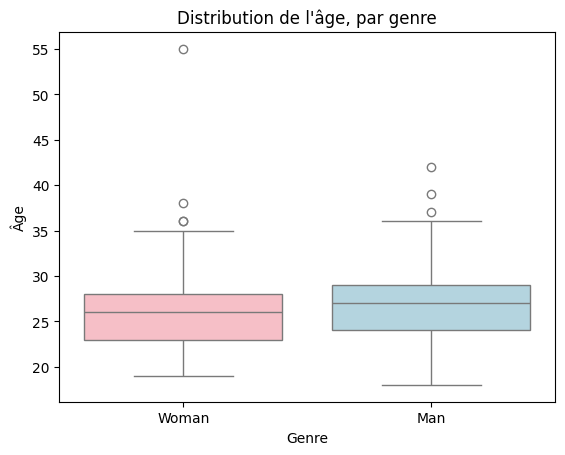

In [21]:
palette_gender = {
  0: "lightpink",
  1: "lightblue"
}

palette_gender_label = {
  "Woman": "lightpink",
  "Man": "lightblue"
}

box = sns.boxplot(participant_df, x='gender_label', y='age',  hue="gender" , palette=palette_gender, legend=False)
box.set_title("Distribution de l'âge, par genre")
box.set_ylabel("Âge")
box.set_xlabel("Genre")


In [22]:
print('Age Descriptive Statistics')
participant_df['age'].describe().round()

Age Descriptive Statistics


count    543.0
mean      26.0
std        4.0
min       18.0
25%       24.0
50%       26.0
75%       28.0
max       55.0
Name: age, dtype: float64

Text(0.5, 0, 'Âge')

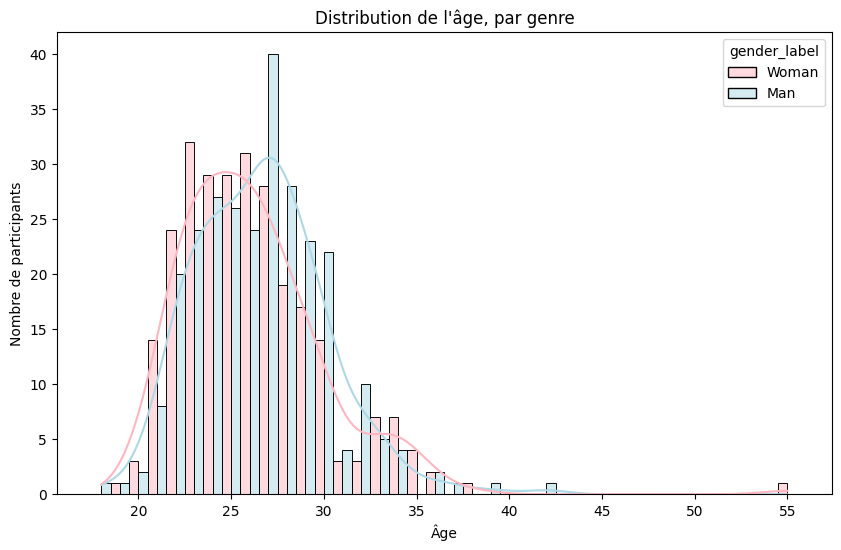

In [23]:
# Default
# sns.set()

fig, ax = plt.subplots(figsize=(10, 6))

hplot = sns.histplot(ax=ax, data=participant_df,
                     x="age", hue="gender_label",
                     discrete=True, multiple="dodge", kde=True,
                     palette=palette_gender_label)

hplot.set_title("Distribution de l'âge, par genre")
hplot.set_ylabel("Nombre de participants")
hplot.set_xlabel("Âge")


Les participants ont majoritairement entre 20 et 30 ans.

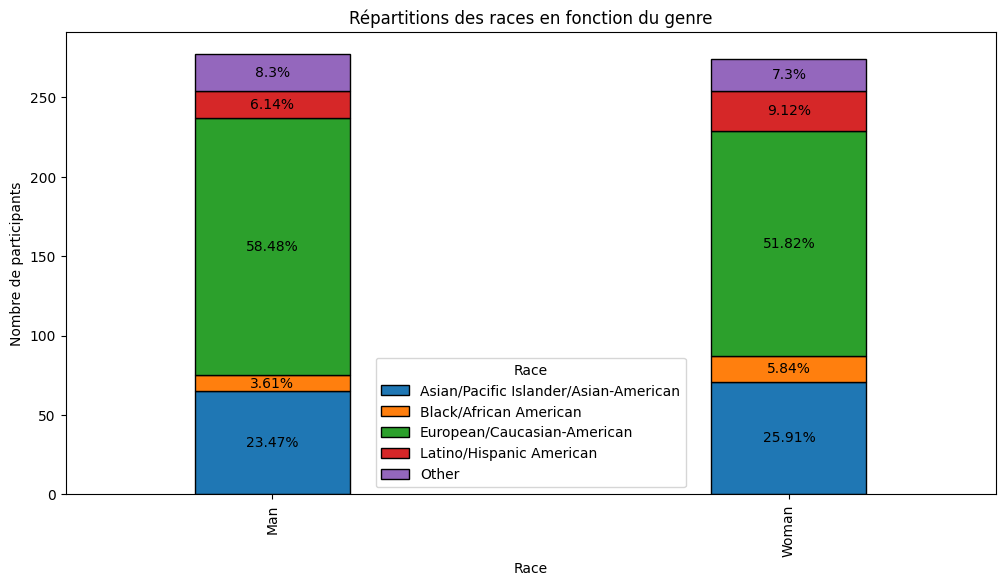

In [24]:
# Répartitions des races en fonction du genre

races_df = participant_df.pivot_table(index='gender_label', columns='race_label', values='iid', aggfunc='count', margins=True, margins_name="Total")
races_histo_df = races_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in races_df.columns[:-1]:
    labels_df[c] = round((100 * races_df[c] / races_df["Total"]), 2)
    labels_df[c] = labels_df[c].astype(str) + "%"

fig, ax = plt.subplots(figsize = (12, 6))

bplot = races_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title("Répartitions des races en fonction du genre")
bplot.set_xlabel("Race")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("Race")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)
    # ax.yaxis.set_major_formatter(mtick.PercentFormatter())  




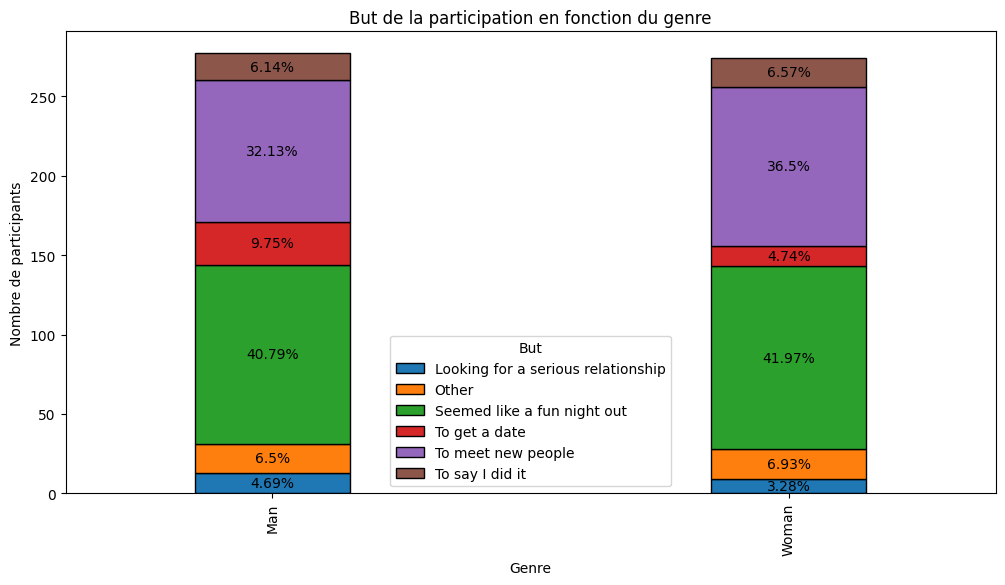

In [25]:
# But de la participation en fonction du genre

goal_df = participant_df.pivot_table(index='gender_label', columns='goal_label', values='iid', aggfunc='count', margins=True, margins_name="Total")
goal_histo_df = goal_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in goal_df.columns[:-1]:
    labels_df[c] = round((100 * goal_df[c] / goal_df["Total"]), 2)
    labels_df[c] = labels_df[c].astype(str) + "%"

fig, ax = plt.subplots(figsize = (12, 6))

bplot = goal_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title("But de la participation en fonction du genre")
bplot.set_xlabel("Genre")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("But")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)

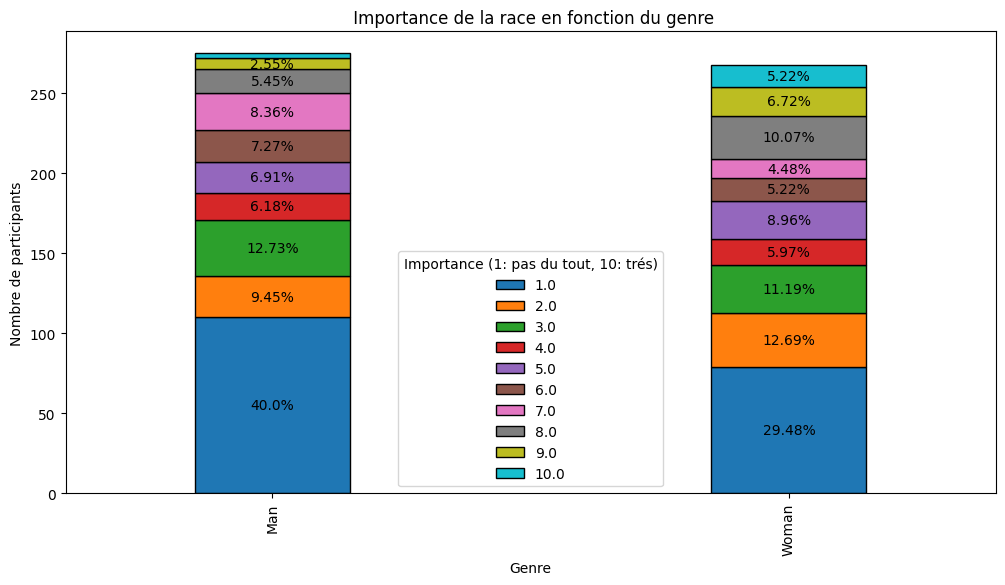

In [26]:
# Importance de la race en fonction du genre, parmi les opinions exprimées
imprace_df = participant_df[participant_df["imprace"] is not None and participant_df["imprace"] > 0].pivot_table(index='gender_label', columns='imprace', values='iid', aggfunc='count', margins=True, margins_name="Total")
imprace_histo_df = imprace_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in imprace_df.columns[:-1]:
    labels_df[c] = round((100 * imprace_df[c] / imprace_df["Total"]), 2)
    labels_df[c] = labels_df[c].map(lambda x: "" if x is None or x < 2.0 else str(x) + "%") #.astype(str) + "%"
    

fig, ax = plt.subplots(figsize = (12, 6))

bplot = imprace_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title(" Importance de la race en fonction du genre")
bplot.set_xlabel("Genre")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("Importance (1: pas du tout, 10: trés)")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)

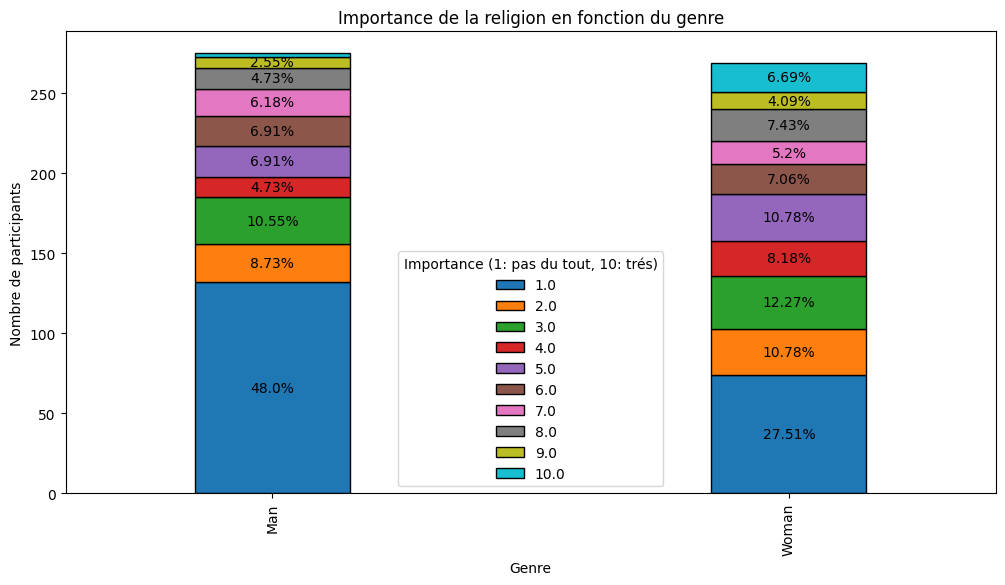

In [27]:
# Importance de la religion en fonction du genre, parmi les opinions exprimées
imprelig_df = participant_df[participant_df["imprelig"] is not None and participant_df["imprelig"] > 0].pivot_table(index='gender_label', columns='imprelig', values='iid', aggfunc='count', margins=True, margins_name="Total")
imprelig_histo_df = imprelig_df.iloc[:-1, :-1]

# Computing labels
labels_df = pd.DataFrame()

for c in imprelig_df.columns[:-1]:
    labels_df[c] = round((100 * imprelig_df[c] / imprelig_df["Total"]), 2)
    labels_df[c] = labels_df[c].map(lambda x: "" if x is None or x < 2.0 else str(x) + "%") #.astype(str) + "%"
    

fig, ax = plt.subplots(figsize = (12, 6))

# sns.set(style="darkgrid")

bplot = imprelig_histo_df.plot.bar(stacked = True,
                  ax = ax,
                  width = 0.3,
                  edgecolor = "black")

bplot.set_title("Importance de la religion en fonction du genre")
bplot.set_xlabel("Genre")
bplot.set_ylabel("Nombre de participants")

bplot.get_legend().set_title("Importance (1: pas du tout, 10: trés)")

# Add labels
for i, c in enumerate(ax.containers):
    labels = labels_df.iloc[:-1, i].tolist()

    ax.bar_label(c,label_type='center',labels=labels)

#### De l'importance des critères

##### Importance présumée

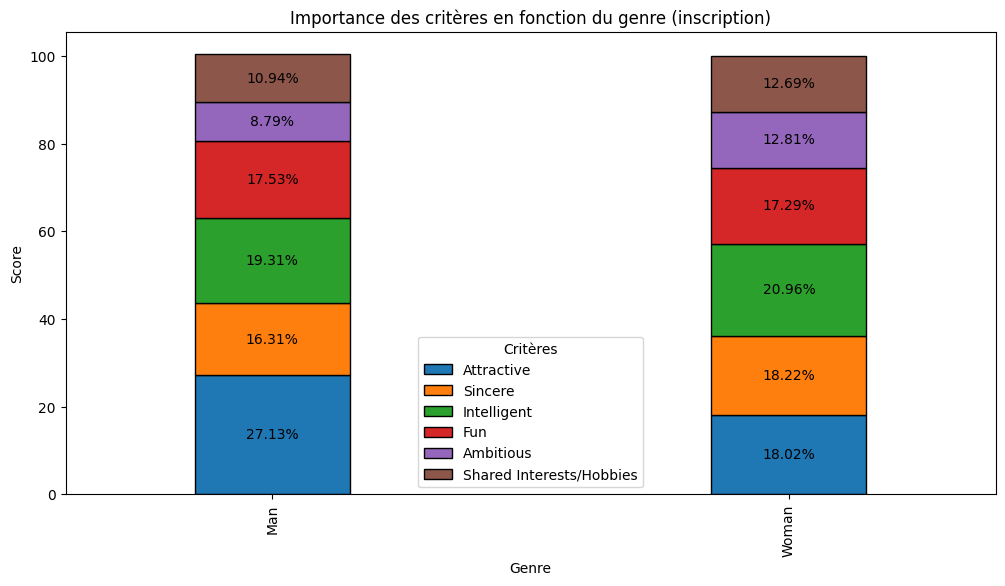

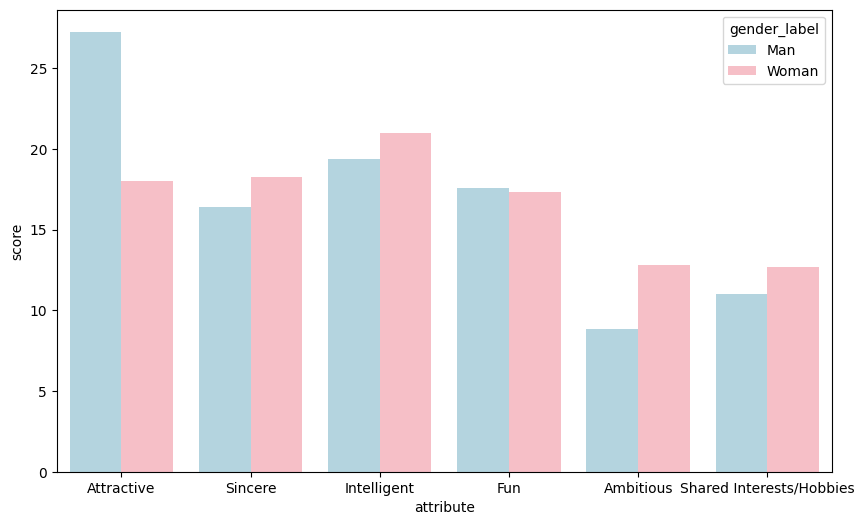

In [62]:
plot_attribute_expectations_per_genre(participant_df, ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"], "Importance des critères en fonction du genre (inscription)", palette_gender_label)


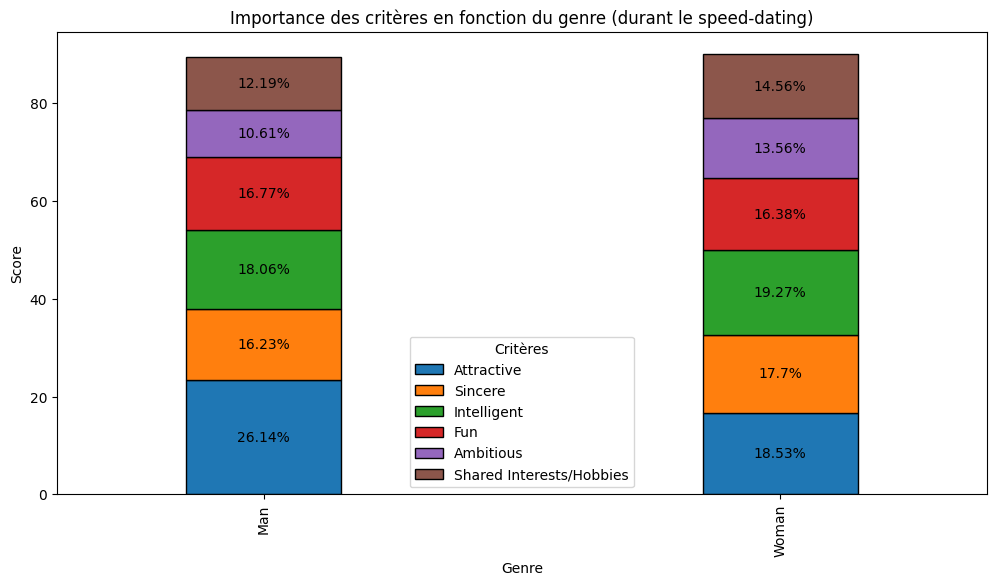

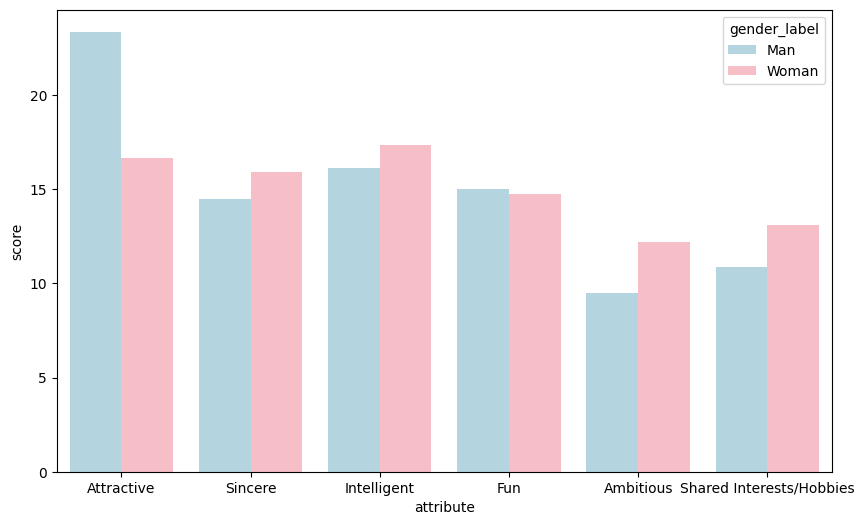

In [61]:
# A mi parcours dans le speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"], "Importance des critères en fonction du genre (durant le speed-dating)", palette_gender_label)


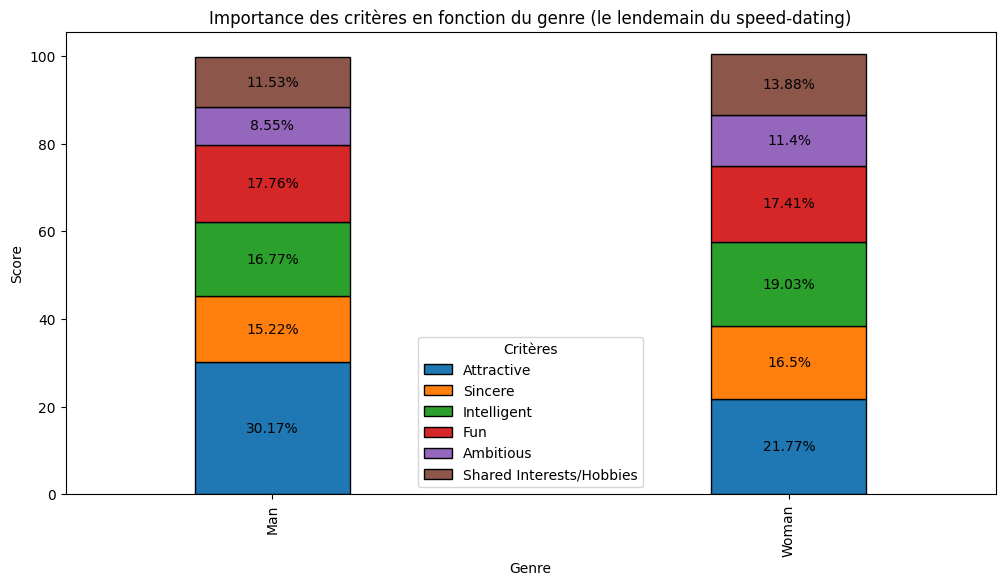

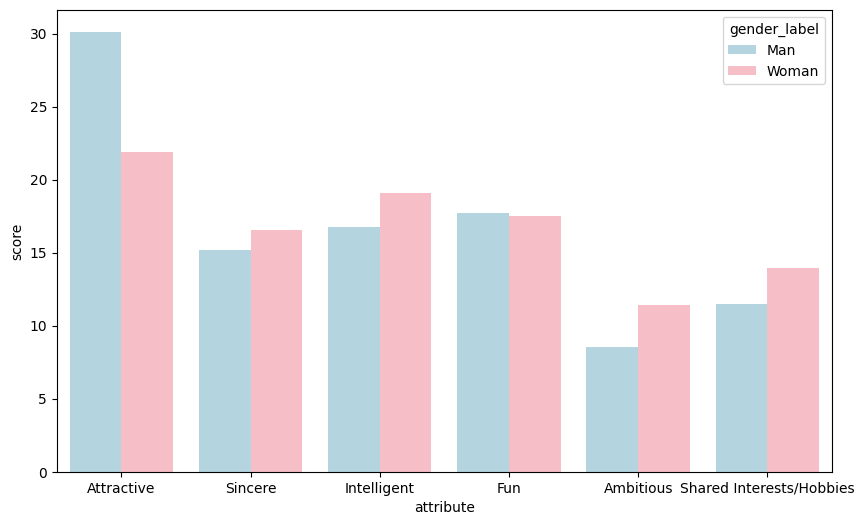

In [60]:
# Le lendemain du speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"], "Importance des critères en fonction du genre (le lendemain du speed-dating)", palette_gender_label)


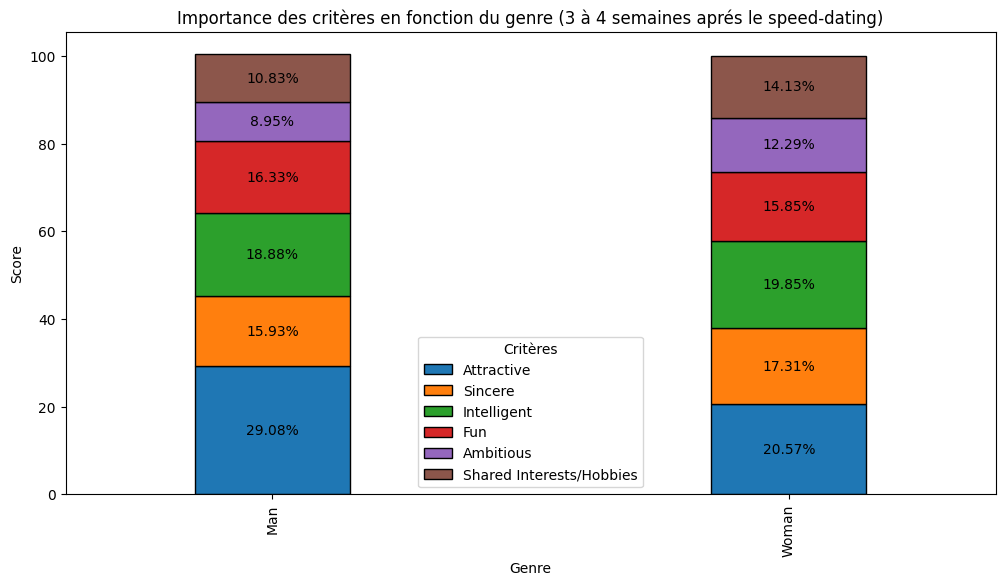

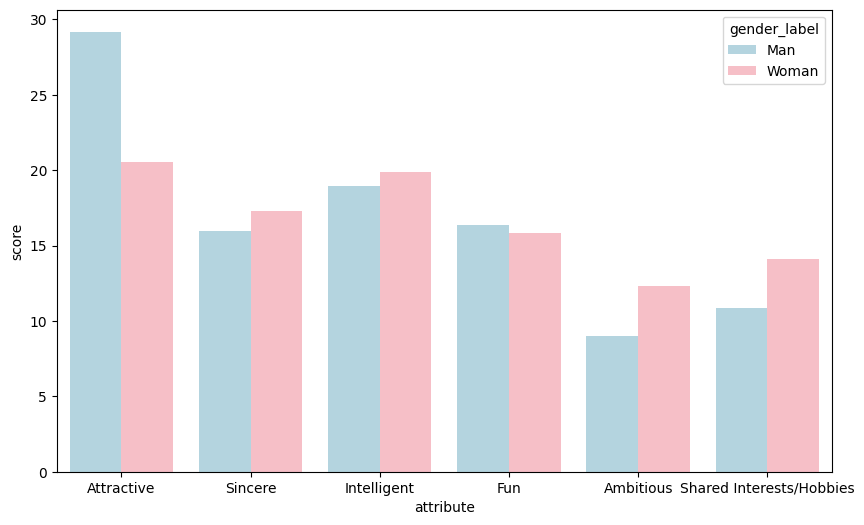

In [59]:
# 3 à 4 semaines aprés le speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"], "Importance des critères en fonction du genre (3 à 4 semaines aprés le speed-dating)", palette_gender_label)


##### Importance réelle

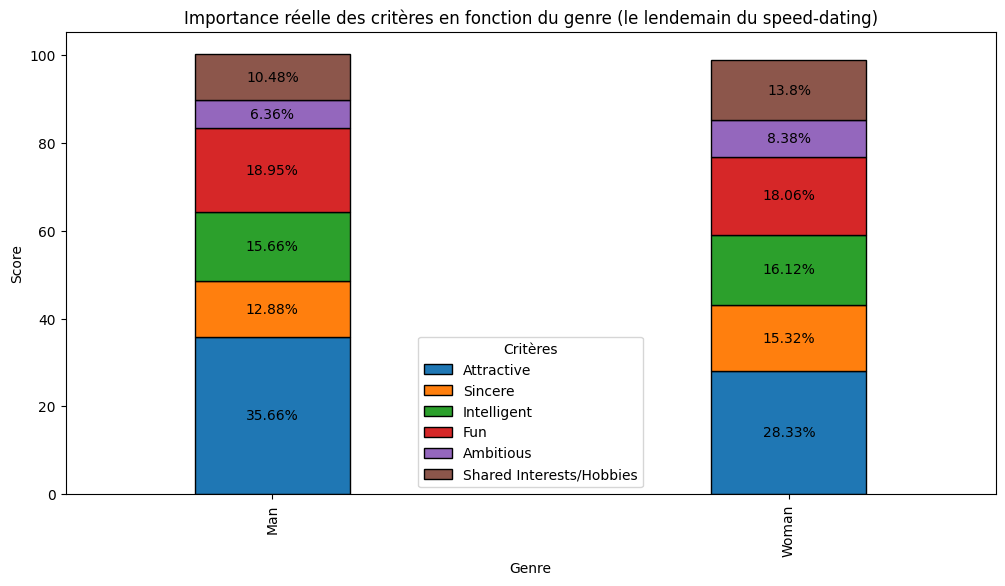

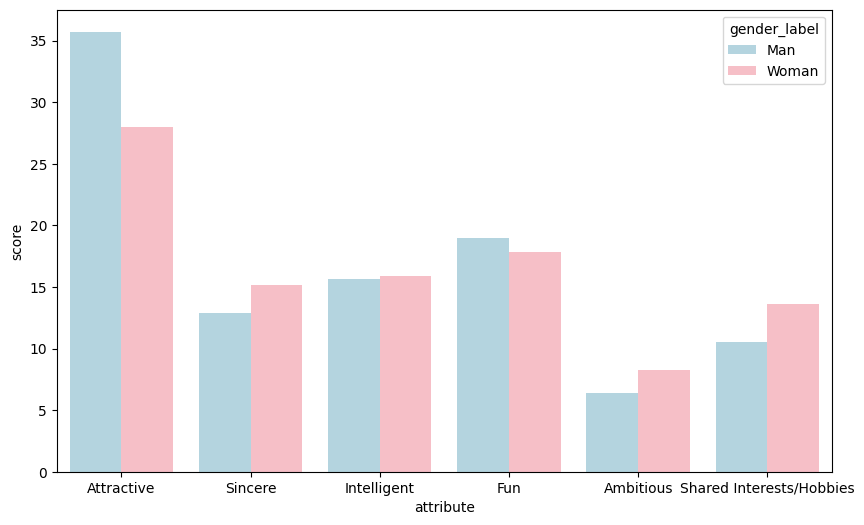

In [58]:
# Le lendemain du speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"], "Importance réelle des critères en fonction du genre (le lendemain du speed-dating)", palette_gender_label)


,gender_label,attribute,score
0,Man,Attractive,36.741379
1,Man,Sincere,13.344828
2,Man,Intelligent,17.172414
3,Man,Fun,17.189655
4,Man,Ambitious,5.896552
5,Man,Shared Interests/Hobbies,9.827586
6,Woman,Attractive,26.958904
7,Woman,Sincere,18.123288
8,Woman,Intelligent,16.452055
9,Woman,Fun,15.054795


,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
gender_label,,,,,,
Man,36.68%,13.32%,17.14%,17.16%,5.89%,9.81%
Woman,26.92%,18.1%,16.43%,15.03%,9.45%,14.06%


ax
36.68%
26.92%
ax
13.32%
18.1%
ax
17.14%
16.43%
ax
17.16%
15.03%
ax
5.89%
9.45%
ax
9.81%
14.06%


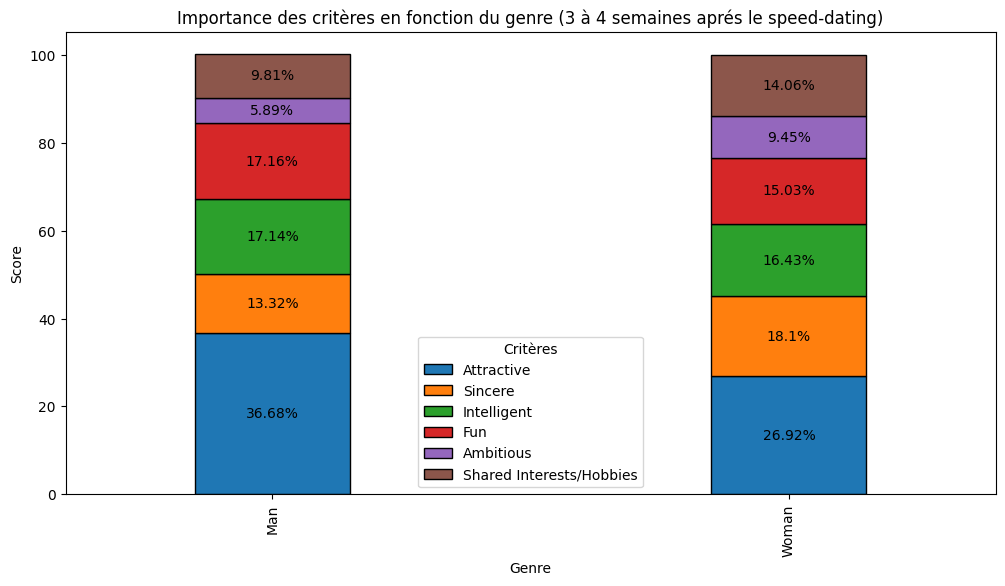

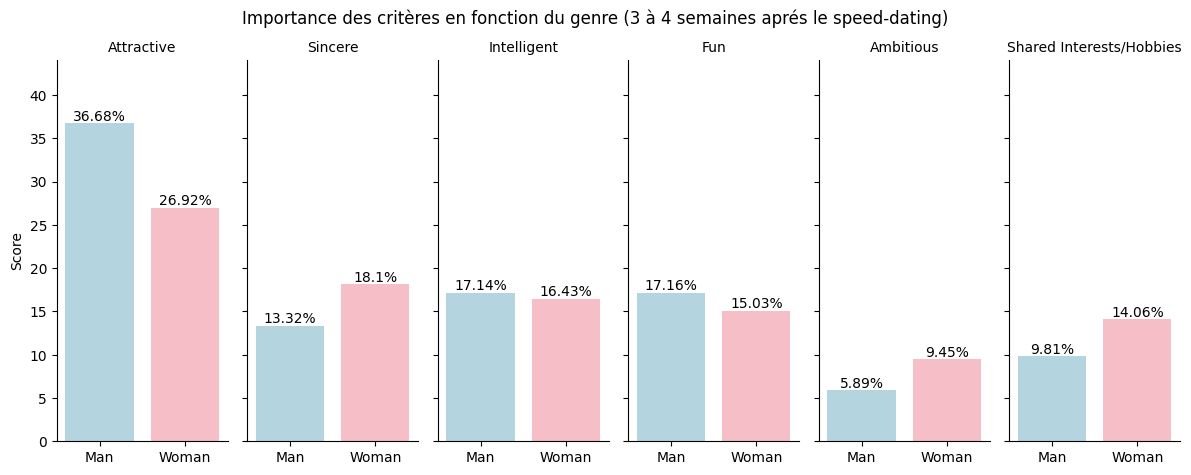

In [92]:
# 3 à 4 semaines aprés le speed-dating
plot_attribute_expectations_per_genre(participant_df, ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"], "Importance des critères en fonction du genre (3 à 4 semaines aprés le speed-dating)", palette_gender_label)


,gender_label,attribute,score
0,Man,Attractive,36.741379
1,Man,Sincere,13.344828
2,Man,Intelligent,17.172414
3,Man,Fun,17.189655
4,Man,Ambitious,5.896552
5,Man,Shared Interests/Hobbies,9.827586
6,Woman,Attractive,26.958904
7,Woman,Sincere,18.123288
8,Woman,Intelligent,16.452055
9,Woman,Fun,15.054795


/home/vscode/.venv/lib/python3.11/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_831/3796692813.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(ax=ax, data=expected_attributes_df,


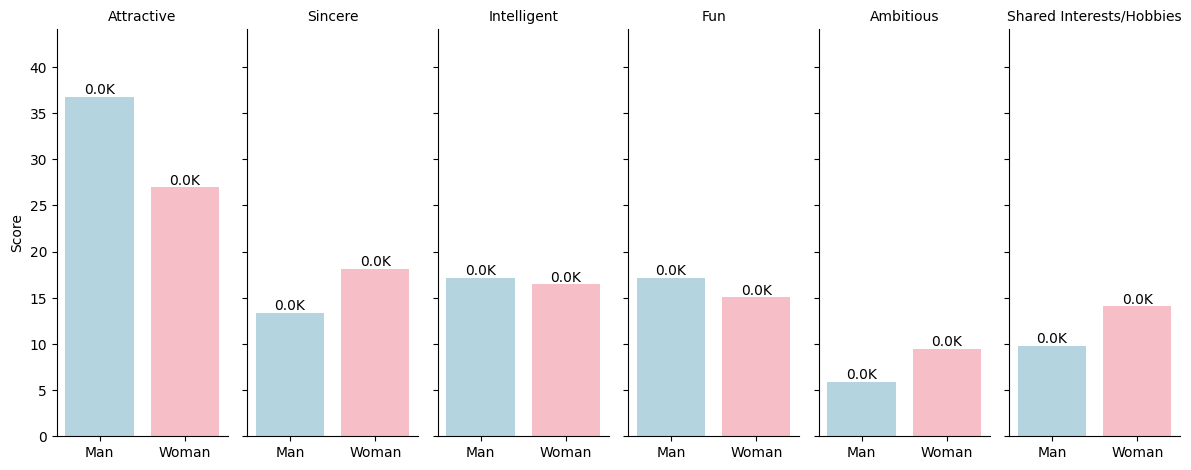

In [88]:

attributes = ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]

expected_attributes_df = participant_df[["gender_label"] + attributes].groupby("gender_label").mean()
#.reset_index().set_index("gender_label")

#df_CohBeh = pd.melt(df, value_vars=['Knn', 'Kss', 'Ktt'], var_name='melt')

# sns.displot(data=df_CohBeh, hue='melt',x='value',
#             kind="kde", fill=True, legend=False, height=5, aspect=1.6, 
#             cut=0, bw_adjust=1)


#display(expected_attributes_df)

# Wide form to long form 
expected_attributes_df = expected_attributes_df.stack().reset_index()
expected_attributes_df.columns = ['gender_label', 'attribute', 'score']

expected_attributes_df["attribute"] = expected_attributes_df["attribute"].map(LabelDecoder.get_attribute_label)

display(expected_attributes_df)

# fig, ax = plt.subplots(figsize=(10, 6))

#sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

#sns.barplot(ax=ax, data=expected_attributes_df, x="attribute", y="score", hue="gender_label", palette=palette_gender_label)

g = sns.catplot(ax=ax, data=expected_attributes_df,
            x="gender_label", y="score",
            col="attribute",
            kind="bar", palette=palette_gender_label, height=5, aspect=.4)

g.set_axis_labels("", "Score")
g.set_titles("{col_name}")


# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
# for c in ax.containers:
#     labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
# g = sns.catplot(
#     data=df, x="who", y="survived", col="class",
#     kind="bar", height=4, aspect=.6,
# )
# g.set_axis_labels("", "Survival Rate")
# g.set_xticklabels(["Men", "Women", "Children"])
# g.set_titles("{col_name} {col_var}")
# g.set(ylim=(0, 1))
# g.despine(left=True)


# g = sns.catplot(
#     data=df, x="who", y="survived", col="class",
#     kind="bar", height=4, aspect=.6,
# )
# g.set_axis_labels("", "Survival Rate")
# g.set_xticklabels(["Men", "Women", "Children"])
# g.set_titles("{col_name} {col_var}")
# g.set(ylim=(0, 1))
# g.despine(left=True)

# hplot = sns.histplot(ax=ax, data=expected_attributes_df,
#                      x="age", hue="gender_label",
#                      discrete=True, multiple="dodge", kde=True,
#                      palette=palette_gender_label)

# hplot.set_title("Distribution de l'âge, par genre")
# hplot.set_ylabel("Nombre de participants")
# hplot.set_xlabel("Âge")

# expected_attributes_df = df[["gender_label"] + attributes].groupby("gender_label").mean()
#     expected_attributes_df["Total"] = expected_attributes_df.sum(axis=1)

#     # Remove "Total" from plot
#     expected_attributes_plot_df = expected_attributes_df.iloc[:,:-1]

#     # Computing labels
#     labels_df = pd.DataFrame()

#     legend_labels = []

#     for c in expected_attributes_df.columns[:-1]:
#         legend_labels.append(LabelDecoder.get_attribute_label(c))

#         labels_df[c] = round((100 * expected_attributes_df[c] / expected_attributes_df["Total"]), 2)
#         labels_df[c] = labels_df[c].map(lambda x: "" if x is None or x < 2.0 else str(x) + "%")

#     fig, ax = plt.subplots(figsize = (12, 6))

#     bplot = expected_attributes_plot_df.plot.bar(stacked = True,
#                     ax = ax,
#                     width = 0.3,
#                     edgecolor = "black")

#     bplot.set_title(title)
#     bplot.set_xlabel("Genre")
#     bplot.set_ylabel("Score")

#     # Add legend with custom labels
#     handles, _ = bplot.get_legend_handles_labels()
#     bplot.legend(handles, legend_labels, title="Critères") # , loc="lower left", bbox_to_anchor=(1.01, 0.29)

#     # Add labels
#     for i, c in enumerate(bplot.containers):
#         labels = labels_df.iloc[:, i].tolist()
#         bplot.bar_label(c,label_type='center',labels=labels)

In [ ]:
# Compute attributes expected vs real among times so we can observe changes over time

# Importance des critères en fonction du genre
expected_time_1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
expected_time_2 = ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"]
expected_time_3 = ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]

# Importance réelle
reel_time_2 = ["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"]
reel_time_3 = ["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]

df = participant_df[["iid", "gender_label"] + expected_time_1 + expected_time_2 + expected_time_3 + reel_time_2 + reel_time_3]
df = df.rename(columns={
    "attr1_1": "T1_expected_attr",
    "sinc1_1": "T1_expected_sinc",
    "intel1_1": "T1_expected_intel",
    "fun1_1": "T1_expected_fun",
    "amb1_1": "T1_expected_amb",
    "shar1_1": "T1_expected_shar",
    
    "attr1_2": "T2_expected_attr",
    "sinc1_2": "T2_expected_sinc",
    "intel1_2": "T2_expected_intel",
    "fun1_2": "T2_expected_fun",
    "amb1_2": "T2_expected_amb",
    "shar1_2": "T2_expected_shar",
    
    "attr1_3": "T3_expected_attr",
    "sinc1_3": "T3_expected_sinc",
    "intel1_3": "T3_expected_intel",
    "fun1_3": "T3_expected_fun",
    "amb1_3": "T3_expected_amb",
    "shar1_3": "T3_expected_shar",
    
    # Reel
    "attr7_2": "T2_reel_attr",
    "sinc7_2": "T2_reel_sinc",
    "intel7_2": "T2_reel_intel",
    "fun7_2": "T2_reel_fun",
    "amb7_2": "T2_reel_amb",
    "shar7_2": "T2_reel_shar",
    "attr7_3": "T3_reel_attr",
    "sinc7_3": "T3_reel_sinc",
    "intel7_3": "T3_reel_intel",
    "fun7_3": "T3_reel_fun",
    "amb7_3": "T3_reel_amb",
    "shar7_3": "T3_reel_shar",
})

# Melt to long format
df_long = df.melt(id_vars=["iid", "gender_label"], var_name='col', value_name='value')

# Extract T and attribute name
df_long[['T', 'attribute']] = df_long['col'].str.extract(r'^(T\d+_[a-z]+)_(.+)$')

# Pivot to get T2 and T3 as columns, variable as row
df_pivot = df_long.pivot(index=["iid", "gender_label", 'attribute'], columns='T', values='value').reset_index()

# Optional: sort columns
df_pivot = df_pivot[["iid", "gender_label", 'attribute'] + sorted([col for col in df_pivot.columns if col.startswith('T')])]

desired_attributes_df = df_pivot[["gender_label", "attribute", "T1_expected", "T2_expected", "T3_expected", "T2_reel", "T3_reel"]].groupby(["gender_label", "attribute"]).mean()
display(desired_attributes_df)


T                       T1_expected  T2_expected  T3_expected    T2_reel    T3_reel
gender_label attribute                                                             
Man          amb           8.823906     8.535344     8.975983   6.370968   5.896552
             attr         27.248751    30.126693    29.182308  35.714286  36.741379
             fun          17.600789    17.736318    16.386923  18.984127  17.189655
             intel        19.387366    16.751420    18.947265  15.682540  17.172414
             shar         10.982218    11.511996    10.870000  10.500000   9.827586
             sinc         16.379562    15.204505    15.980171  12.903226  13.344828
Woman        amb          12.818410    11.446744    12.294178   8.274194   9.465753
             attr         18.020307    21.862901    20.565685  27.984127  26.958904
             fun          17.299048    17.489760    15.851301  17.841270  15.054795
             intel        20.970942    19.117995    19.846712  15.920635  16.452055
             shar         12.697782    13.942427    14.129589  13.634921  14.082192
             sinc         18.222164    16.576530    17.313767  15.129032  18.123288

#### <span style="color:green"><b>Remarques</b></span> 

- Les participants ont majoritairement entre 20 et 30 ans
- Les deux genres sont équitablements répartis et représentés (nombre: heureusement pour du dating, races, ages)
- Les motifs de participations, quelque soit le sexe, sont principalements **pour le fun** et **pour faire de nouvelles rencontres**
- concernant la sensibilité quant aux réligions et races:
  - les hommes sont plus ouverts sur ces aspects
  - une plus grande proportion de femmes est attachés au partage d'une même réligion ou même race
  - 50% des femmes et 66% des hommes on exprimé un faible niveau d'attachement à une religion commune (score <=3)
- Les hommes semblent accorder plus d'intérêt pour l'attractivité d'une femme que pour son intelligence
- Les femmes sont moins intéressées par l'ambition ou les centre d'intérêt en commun, en préférant légèrement un partenaire intelligent
- Les deux sexes accordent une importance similaire au coté "fun" du partenaire

## Analyse des rencontres entre participants et des "Match"

In [ ]:
# match | 1 = oui (match réciproque), 0 = non
# dec | Décision du participant (1 = oui, 0 = non)
# dec_o | Décision du partenaire (1 = oui, 0 = non)
# int_corr | Corrélation entre les intérêts (Time 1)
# samerace | 1 = même race, 0 = différente


In [ ]:
corr = participant_df.corrwith(participant_df["match_count"], numeric_only=True)
results = pd.DataFrame(corr, columns=['Correlation'])
results.sort_values(by="Correlation", ascending=False).head(25)

,Correlation
match_count,1.000000
dec_o_count,0.597495
dec_count,0.510005
expnum,0.243018
fun7_2,0.228074
fun1_s,0.180266
intel1_s,0.157946
fun1_2,0.152953
fun1_3,0.151509
attr1_s,0.141538


In [28]:
desired_attributes_df = participant_df[["gender_label", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]].groupby("gender_label").mean()

print(desired_attributes_df)
#  "attr1_1",
#     "sinc1_1",
#     "intel1_1",
#     "fun1_1",
#     "amb1_1",
#     "shar1_1",
#     "attr4_1",
#     "sinc4_1",
#     "intel4_1",
#     "fun4_1",
#     "amb4_1",
#     "shar4_1",
#     "attr2_1",
#     "sinc2_1",
#     "intel2_1",
#     "fun2_1",
#     "amb2_1",
#     "shar2_1",
#     "attr3_1",
#     "sinc3_1",
#     "intel3_1",
#     "fun3_1",
#     "amb3_1",
#     "attr5_1",
#     "sinc5_1",
#     "intel5_1",
#     "fun5_1",
#     "amb5_1",

                attr1_1    sinc1_1   intel1_1     fun1_1     amb1_1    shar1_1
gender_label                                                                  
Man           27.248751  16.379562  19.387366  17.600789   8.823906  10.982218
Woman         18.020307  18.222164  20.970942  17.299048  12.818410  12.697782


In [ ]:
# plt.figure(figsize = (15, 6))

# # ,bins=9,kde=True
# plot=sns.histplot(speed_dating_df.age, bins = 50, kde = True)
# plt.title('Age Distribution')
# plt.show ()

# fig, ax = plt.subplots(figsize=(k_Width, k_Height))
# sns.countplot(traits, x="age", hue="gender", palette=palette_gender, legend=False)
# ax.set_title("Per gender, distribution among the ages");

: 

: 

In [34]:

# Informations personnelles et attentes des participants
# participant_df = speed_dating_df[participant_cols].drop_duplicates().reset_index(drop=True)
participant_matches_df = participant_matches_df.drop_duplicates().reset_index(drop=True)
display(participant_matches_df.info())

print("Registered participants: ", len(participant_matches_df["iid"].unique()))
print("Unique participant ids: ", len(speed_dating_df["iid"].unique()))
print("Both numbers should be equal...")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   Int64  
 1   gender    8378 non-null   Int64  
 2   position  8378 non-null   Int64  
 3   order     8378 non-null   Int64  
 4   pid       8368 non-null   Int64  
 5   match     8378 non-null   Int64  
 6   int_corr  8220 non-null   float64
 7   samerace  8378 non-null   Int64  
 8   age_o     8274 non-null   float64
 9   race_o    8378 non-null   Int64  
 10  age       8283 non-null   float64
 11  race      8378 non-null   Int64  
 12  dec       8378 non-null   Int64  
 13  dec_o     8378 non-null   Int64  
dtypes: Int64(11), float64(3)
memory usage: 1006.5 KB


None

Registered participants:  551
Unique participant ids:  551
Both numbers should be equal...


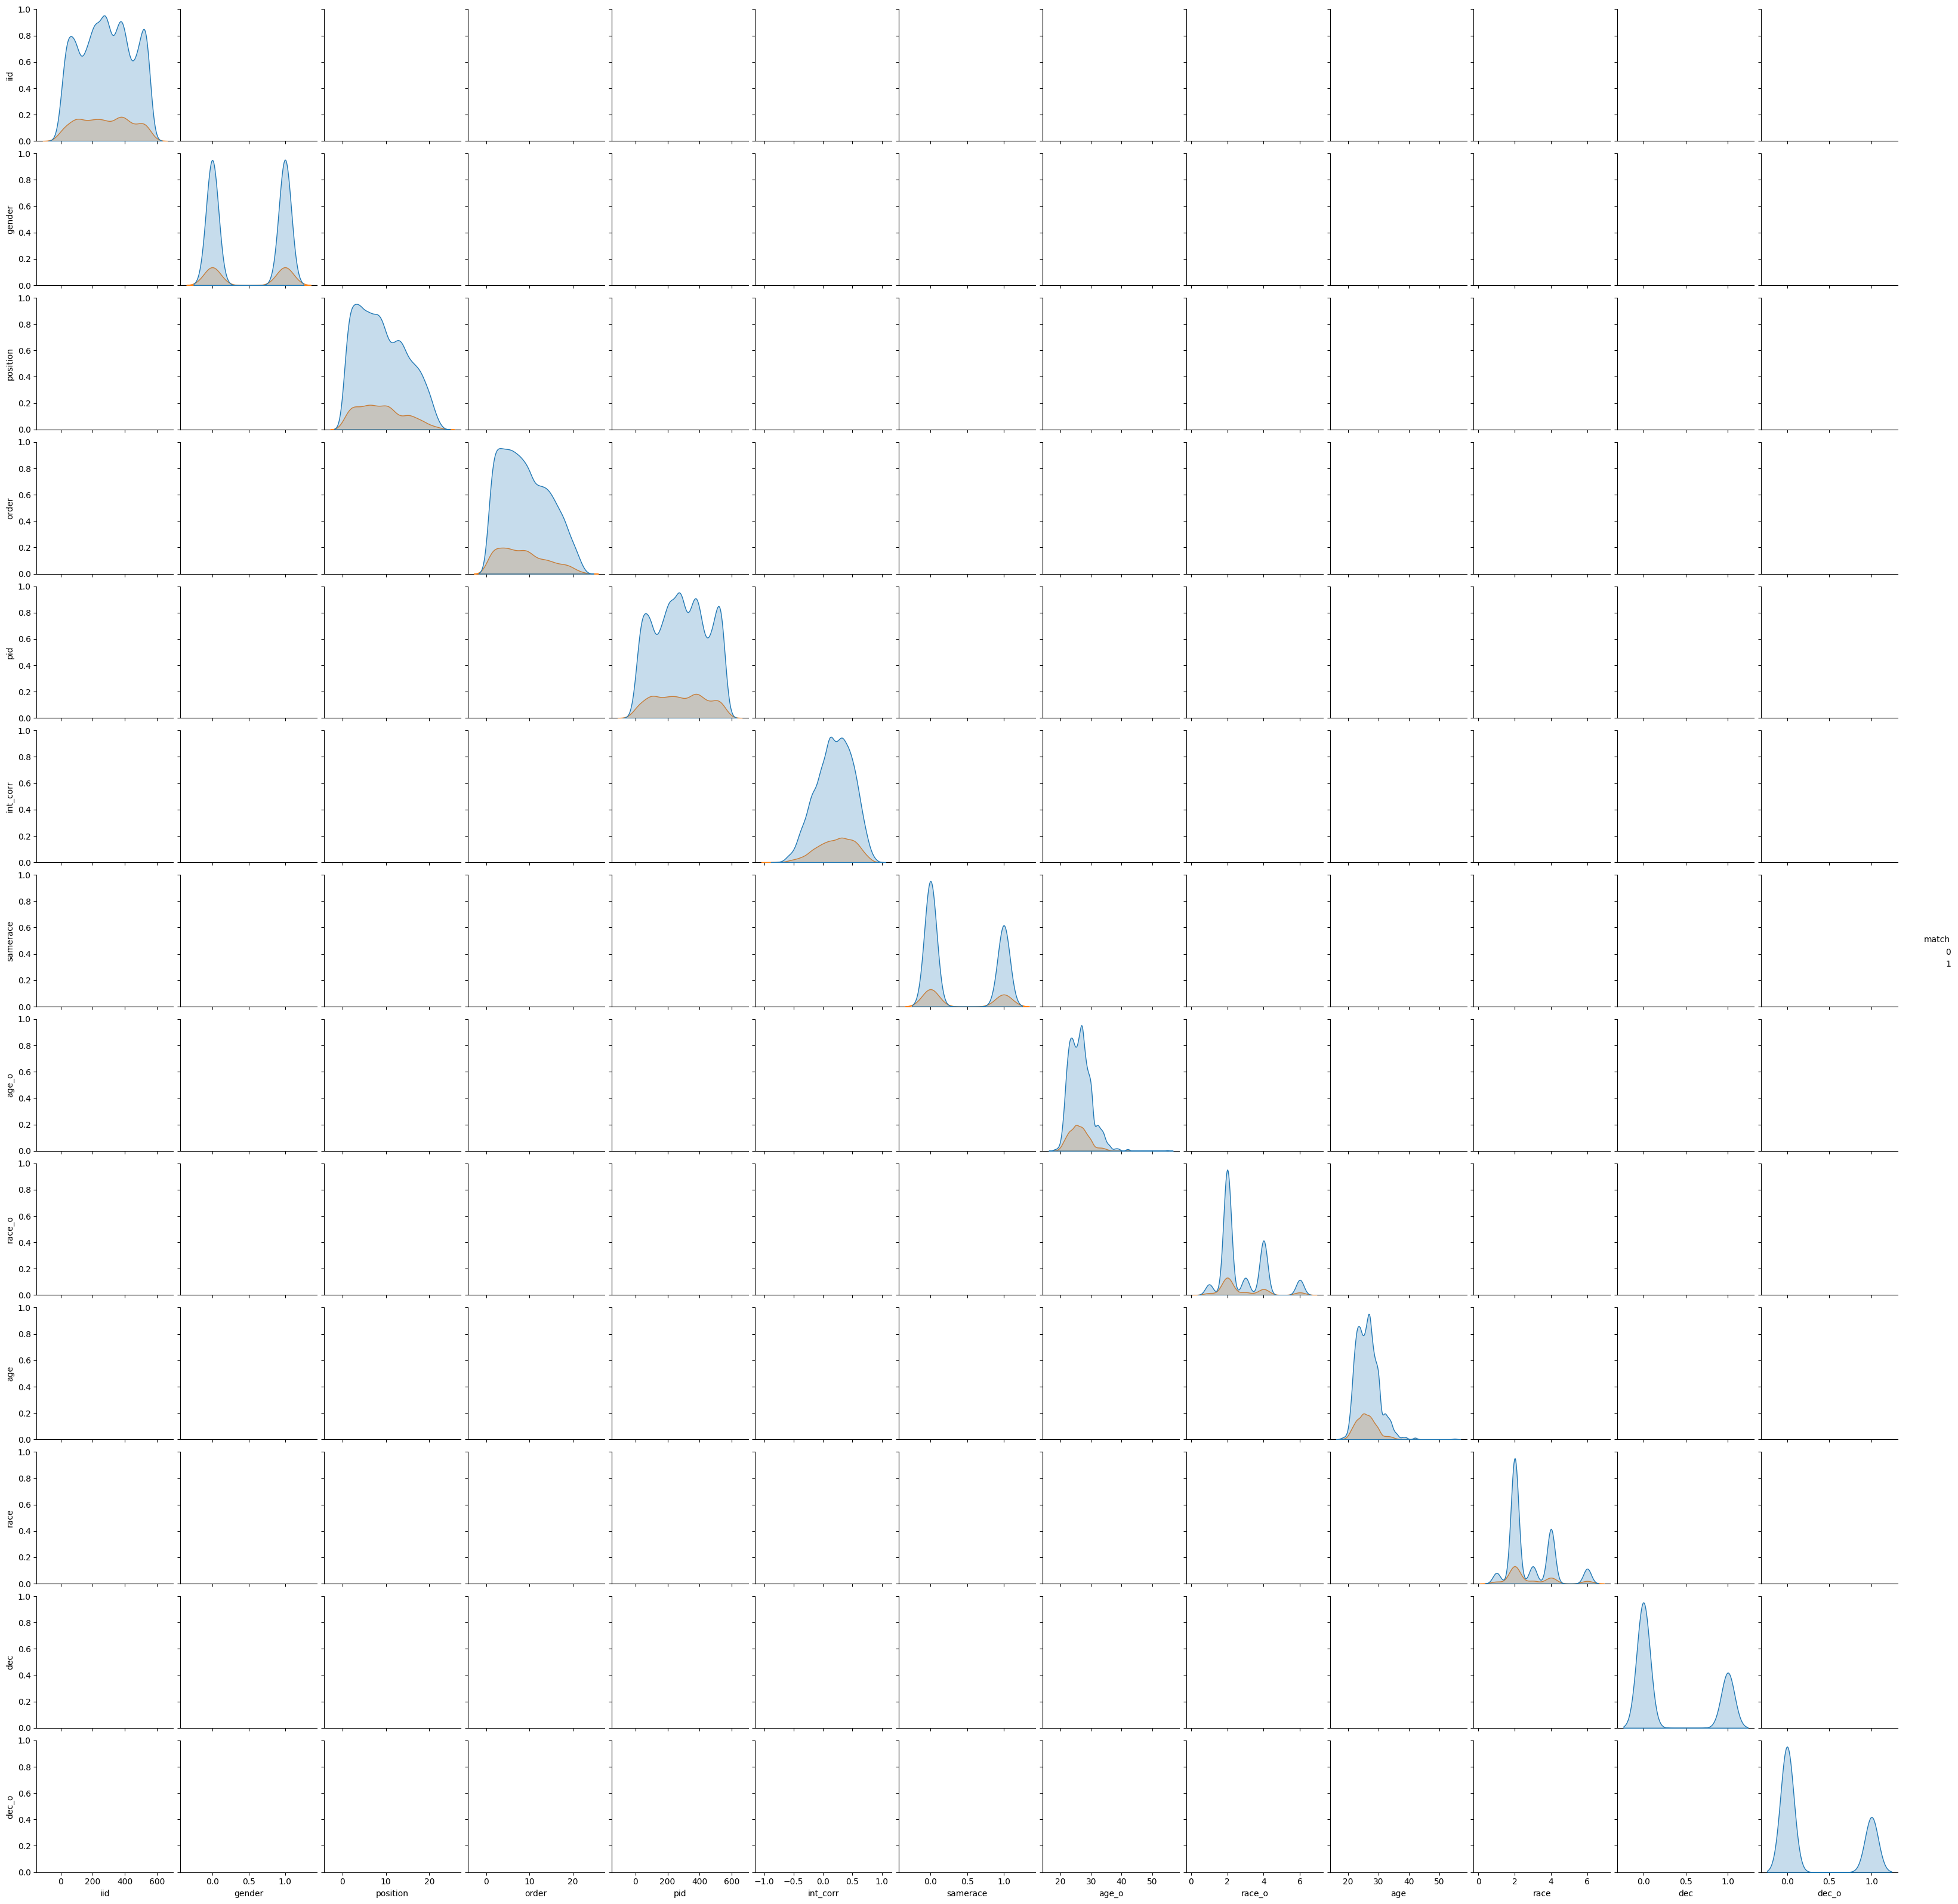

In [30]:
####Pairplot with numerical features (Before the dummy encoding):
participant_matches_df = speed_dating_df[["iid", "gender", "position", "order", "pid", "match", "int_corr", "samerace", "age_o", "race_o", "age", "race", "dec", "dec_o"]]

sns.pairplot(participant_matches_df,
             hue="match", 
             kind='dec_o', 
             plot_kws={'scatter_kws': {'alpha': 0.5, 's':8}})





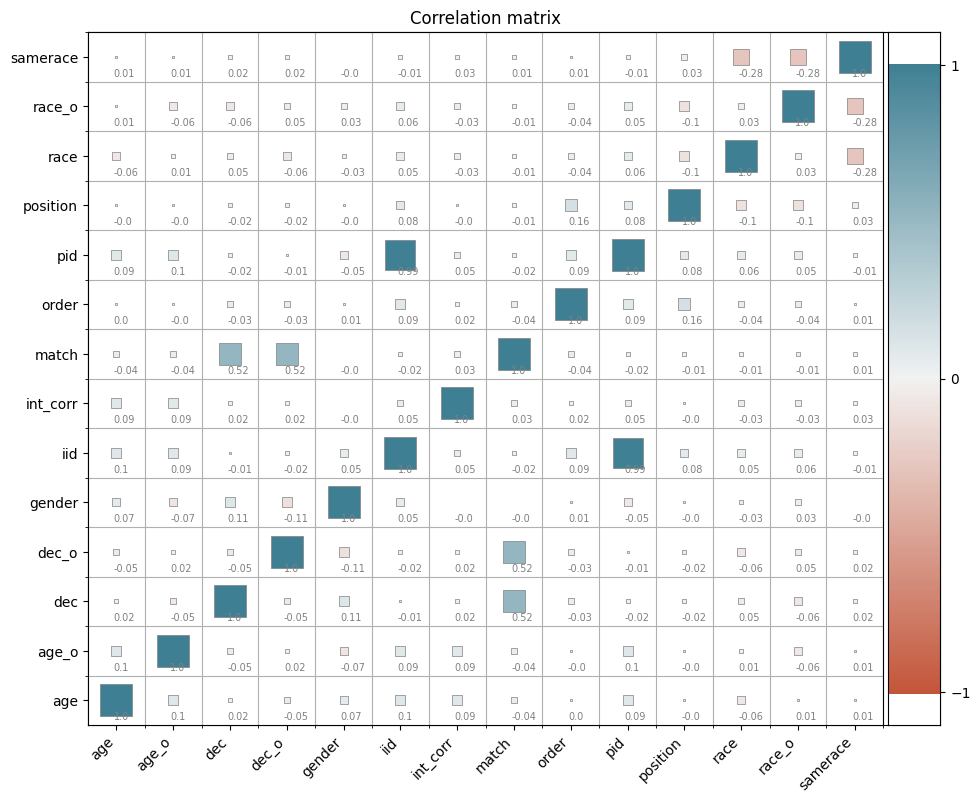

In [31]:
from viz import show_correlation_matrix

# #Let dummy encode the categorical features and plot the correlation matrix again and see if source and countries have a big impact
# corr = pd.get_dummies(data, drop_first = True)

# display(corr)

show_correlation_matrix(
    data=participant_matches_df,
    figsize=(11,9), 
    corr_label_size = 7
)



In [ ]:
# Correlation with match

# speed_dating_df

sns.heatmap(speed_dating_df.corr())

ValueError: could not convert string to float: 'Law'

: 